In [1]:
import face_alignment
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import json
import pickle

In [2]:
#pred_list 格式为x,y
#opencv 格式y,x

In [3]:
selected_root = '/DATA5_DB8/data/zdcheng/hyperthyreosis_eye/selected/'
output_dict = '/DATA5_DB8/data/zdcheng/hyperthyreosis_eye/selected/points.dict'

img_list = os.listdir(selected_root)
img_list = [i for i in img_list if i.endswith('jpg') or i.endswith('JPG')]
all_img_list = [selected_root + i for i in img_list]

with open(output_dict,'rb') as f:
    pred_dict = pickle.load(f)


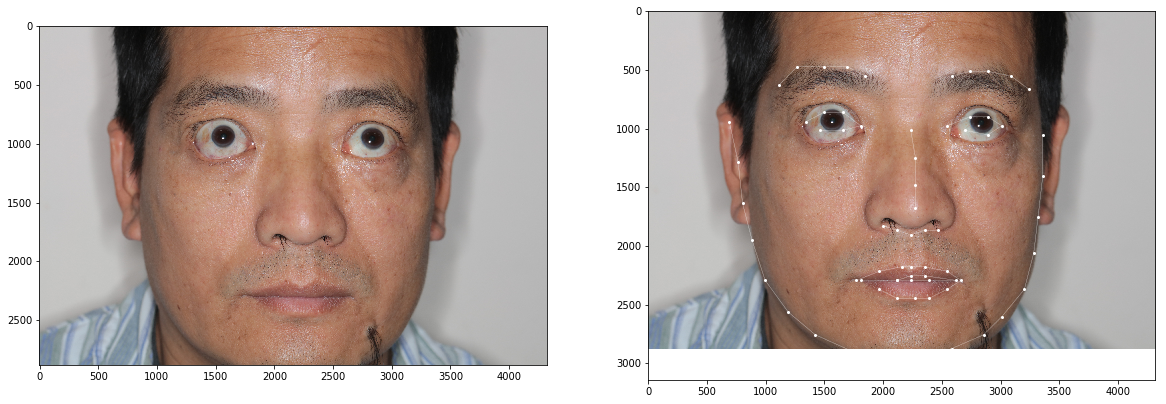

In [4]:
random.seed(30)
idx = random.randint(0,len(img_list))
# all_img_path = all_img_list[idx]
img_path = img_list[idx]
pred_ori = pred_dict[img_path]

img = cv2.imread(all_img_path)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(img_RGB)

ax2.plot(pred_ori[0:17,0],pred_ori[0:17,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #下巴
ax2.plot(pred_ori[17:22,0],pred_ori[17:22,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #左眉毛
ax2.plot(pred_ori[22:27,0],pred_ori[22:27,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #右眉毛
ax2.plot(pred_ori[27:31,0],pred_ori[27:31,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #鼻梁
ax2.plot(pred_ori[31:36,0],pred_ori[31:36,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #鼻翼
ax2.plot(pred_ori[36:42,0],pred_ori[36:42,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #左眼
ax2.plot(pred_ori[42:48,0],pred_ori[42:48,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #右眼
ax2.plot(pred_ori[48:60,0],pred_ori[48:60,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #嘴唇外轮廓
ax2.plot(pred_ori[60:68,0],pred_ori[60:68,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #嘴唇内轮廓

In [5]:
xs = pred_ori[:,0]
ys = pred_ori[:,1]
#17:22 左眉毛从左到右
#22:27 右眉毛从左到右
#36:42 左眼，从左眼角开始顺时针
#42:48 右眼，从左眼角开始顺时针

In [6]:
min_x = min(xs[17],xs[42])
max_x = max(xs[26],xs[45])
#整个眼睛和眉毛部位的左右边界点

In [7]:
xs

array([ 690,  766,  803,  883,  996, 1193, 1423, 1773, 2196, 2586, 2856,
       3010, 3203, 3283, 3320, 3360, 3360, 1113, 1269, 1499, 1693, 1849,
       2586, 2740, 2893, 3090, 3243, 2236, 2276, 2276, 2276, 2003, 2120,
       2236, 2353, 2470, 1346, 1499, 1656, 1809, 1656, 1463, 2546, 2740,
       2893, 3010, 2893, 2700, 1773, 1966, 2160, 2236, 2353, 2546, 2663,
       2546, 2390, 2276, 2120, 1966, 1809, 2120, 2236, 2353, 2623, 2390,
       2236, 2120])

In [8]:
min_y = np.amin(ys)
max_y = max(np.amax(ys[36:42]),np.amax(ys[42:48]))
#整个眼睛和眉毛部位的上下边界点

In [9]:
ys

array([ 940, 1286, 1636, 1946, 2293, 2563, 2756, 2913, 2990, 2873, 2756,
       2603, 2369, 2059, 1749, 1403, 1053,  630,  473,  473,  473,  553,
        553,  513,  513,  553,  666, 1016, 1250, 1480, 1673, 1829, 1866,
       1906, 1866, 1866,  940,  860,  860,  976, 1016, 1016,  976,  900,
        900,  976, 1053, 1016, 2293, 2216, 2176, 2176, 2176, 2216, 2293,
       2369, 2446, 2446, 2446, 2369, 2293, 2293, 2253, 2253, 2293, 2293,
       2293, 2293])

In [10]:
crop_min_y = min_y
crop_max_y = 2*max_y - min_y #向下延伸一倍

eye_length = int((xs[39] - xs[36] + xs[45] - xs[42])/2)
crop_min_x = int(min_x - eye_length* 1/4)
crop_max_x = int(max_x + eye_length* 1/4)

In [11]:
crop_img_RGB = img_RGB[min_y:max_y,min_x:max_x,:]

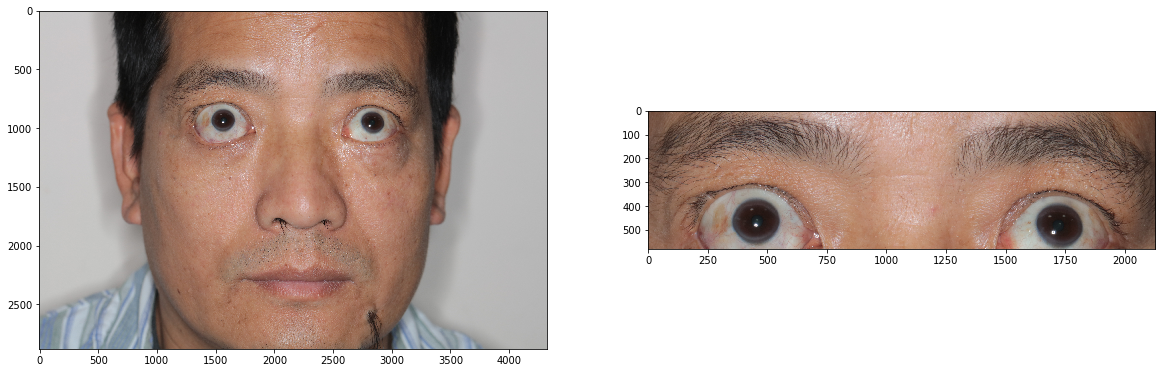

In [12]:

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(crop_img_RGB)


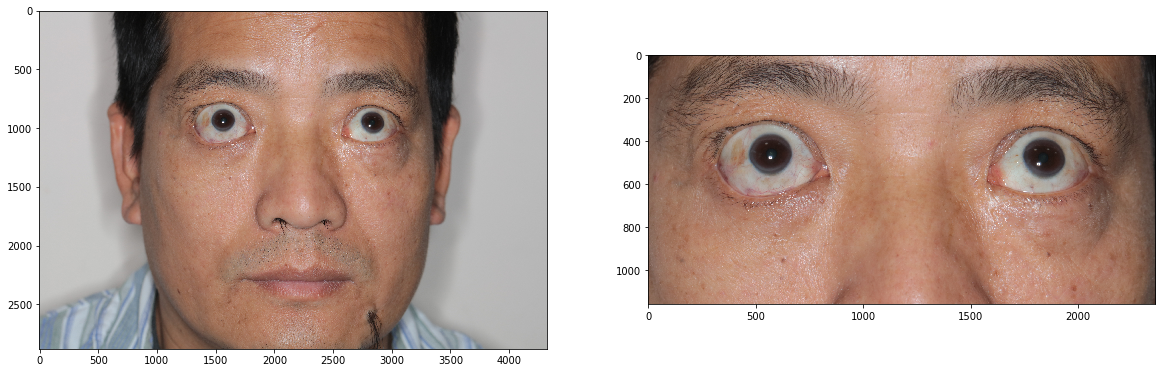

In [13]:
crop_img_RGB = img_RGB[crop_min_y:crop_max_y,crop_min_x:crop_max_x,:]
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(crop_img_RGB)

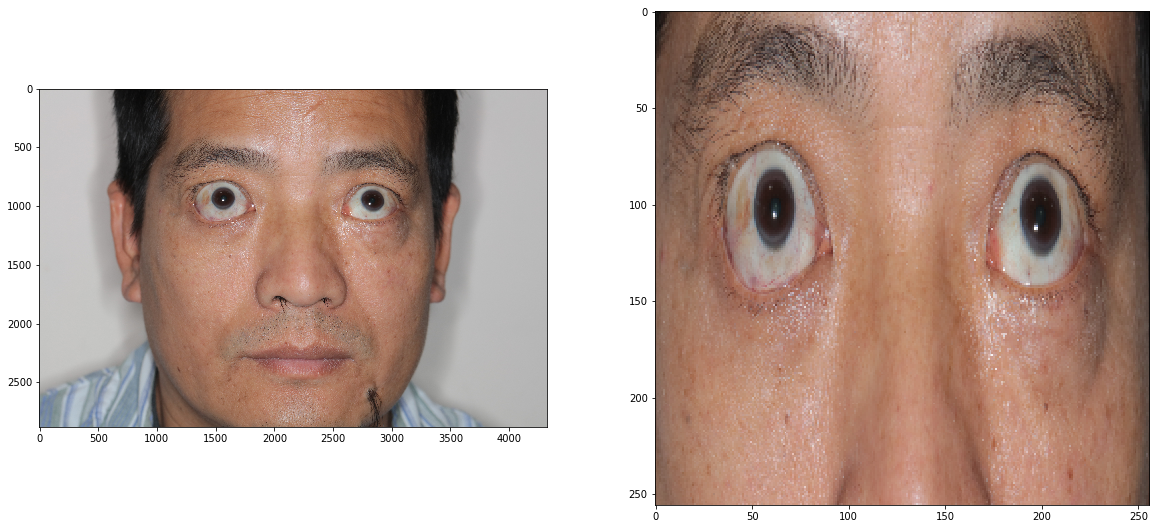

In [14]:
resize_crop_img_RGB = cv2.resize(crop_img_RGB,(256,256))
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(resize_crop_img_RGB)